In [54]:
from astropy.io import fits
import sep
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

if data.dtype.byteorder == '>':
    data = data.byteswap().newbyteorder()

bkg = sep.Background(data)
data_sub = data - bkg.back()

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)


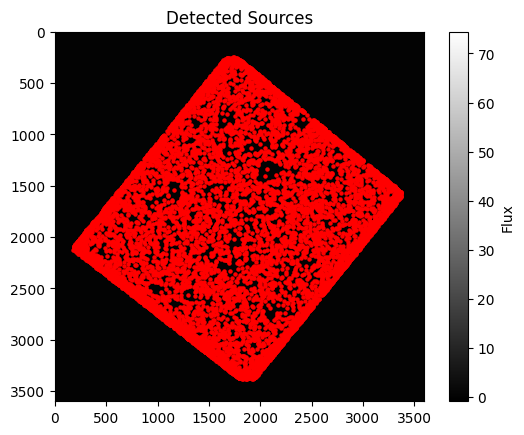

In [56]:
plt.figure()
plt.imshow(data_sub, cmap='gray')
plt.colorbar(label='Flux')
plt.scatter(objects['x'], objects['y'], marker='o', color='red', s=5)
plt.title('Detected Sources')
plt.savefig('detected_sources.png')
plt.show()


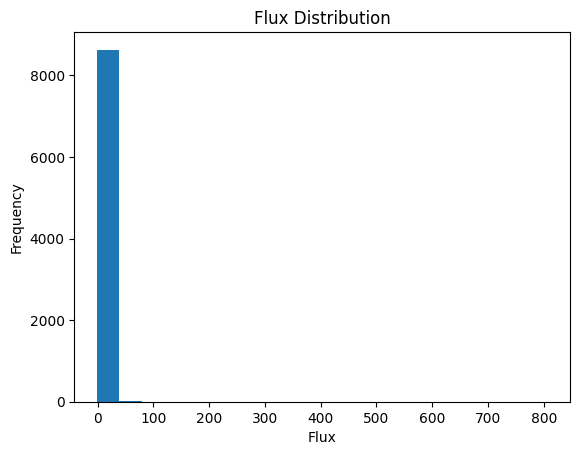

In [57]:
plt.figure()
plt.hist(flux, bins=20)
plt.xlabel('Flux')
plt.ylabel('Frequency')
plt.title('Flux Distribution')
plt.savefig('flux_distribution.png')
plt.show()


In [58]:
num_sources = len(objects)

flux_mean = np.mean(flux)
flux_median = np.median(flux)
flux_std = np.std(flux)


In [59]:
largest_outlier_index = np.argmax(flux)
largest_outlier_flux = flux[largest_outlier_index]
largest_outlier_x = objects['x'][largest_outlier_index]
largest_outlier_y = objects['y'][largest_outlier_index]

std_dev_from_mean = (largest_outlier_flux - flux_mean) / flux_std


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


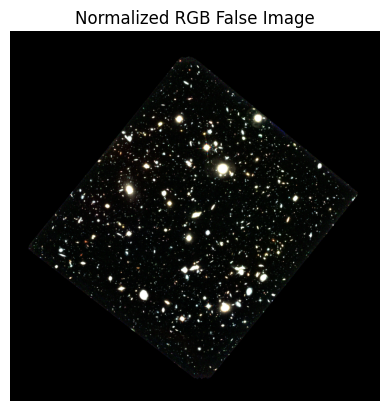

In [60]:
f125w_data = fits.getdata('/Users/logandevries/Desktop/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')  # macOS example
f160w_data = fits.getdata('/Users/logandevries/Desktop/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')  # macOS example

rgb_image = np.dstack((f160w_data, f125w_data, data))

rgb_image_normalized = rgb_image.astype(np.float32)
rgb_image_normalized /= np.percentile(rgb_image_normalized, 99)  # Adjust normalization based on the 99th percentile
rgb_image_normalized[rgb_image_normalized > 1] = 1  # Clip values above 1

plt.figure()
plt.imshow(rgb_image_normalized)
plt.title('Normalized RGB False Image')
plt.axis('off')
plt.savefig('normalized_rgb_image.png')
plt.show()